In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import cmath

In [94]:
def FFT(values):
    N = len(values)
    logN = math.floor(math.log2(N))
    if 2**logN != N:
        for i in range (N, 2**(logN + 1)):
            values.append(0)
        N = 2**(logN + 1)
    PI = math.pi
    t = cmath.exp(-2*PI*1j / N)
    if N > 1:
        val1 = [values[i] for i in range(0, N, 2)]
        val2 = [values[i] for i in range(1, N, 2)]
        values = FFT(val1) + FFT(val2)
        for j in range(N//2):
            former = values[j]
            values[j] += values[j + N//2] * t**j
            values[j + N//2] = former - values[j + N//2] * t**j
    return values

In [95]:
def FFTReverse(values):
    temp = FFT(np.asarray(values).conjugate().tolist())
    temp = np.asarray(temp).conjugate()/len(values)
    return temp

In [96]:
def x(x):
    return x
def square_x(x):
    return x**2
def sin_x(x):
    return math.sin(x)
def sin_square_x(x):
    return math.sin(x**2)
def sin_div_x(x):
    if x == 0:
        return 0
    else:
        return math.sin(x)/x

In [140]:
def FFT_reduce(values, D = 0):
    values_cp = list(values)
    real_len = len(values)
    N = real_len
    logN = math.floor(math.log2(N))
    if 2**logN != N:
        for i in range (N, 2**(logN + 1)):
            values_cp.append(0)        
        N = 2**(logN + 1)
    transformed = FFT(values_cp)
    for i in range(real_len - D, real_len):
        transformed[i] = 0
    temp = FFTReverse(transformed)
    return [x.real for x in temp[:real_len]]

In [170]:
def compare(func, n, count = 3, size = 5):
    # Убираем (0, count) последних коэффициентов
    # Видно, что уже при удалении 1 последнего график меняется
    X = [x*0.01 for x in range(1001)]
    Y0 = [func(x) for x in X]
    # original
    plt.subplot(size, count + 1, 1 + (count+1)*n)
    plt.plot(X, Y0)
    # transformed
    for i in range(count):
        Y = FFT_reduce(Y0, i)
        plt.subplot(size, count + 1, i + 2 + (count+1)*n)
        plt.plot(X, Y)

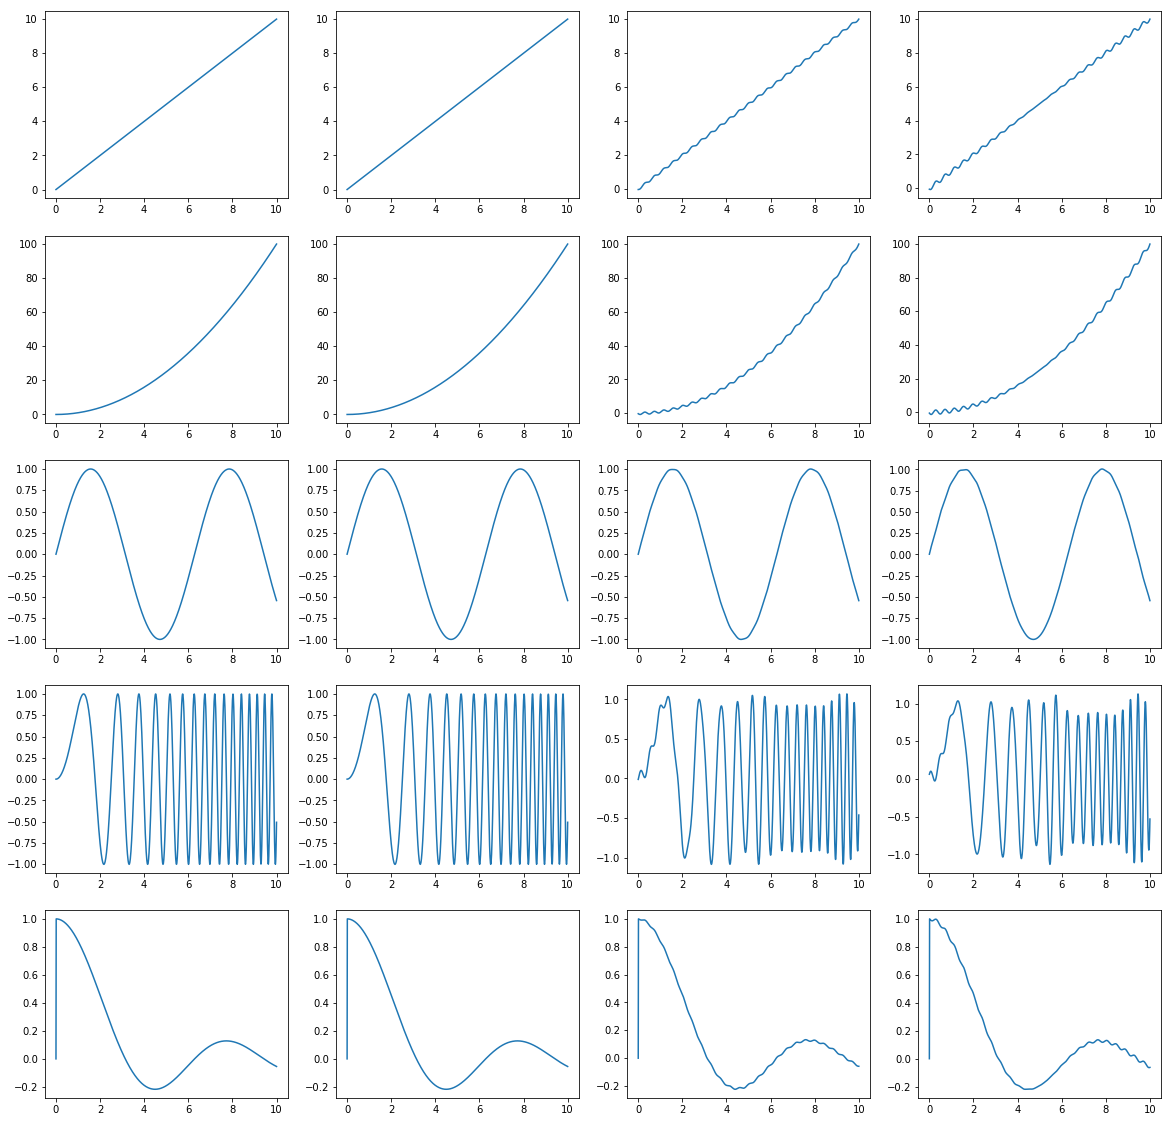

In [171]:
func_list = [x, square_x, sin_x, sin_square_x, sin_div_x]
plt.figure(figsize = (20, 20))
for i in range(5):
    compare(func_list[i], i)

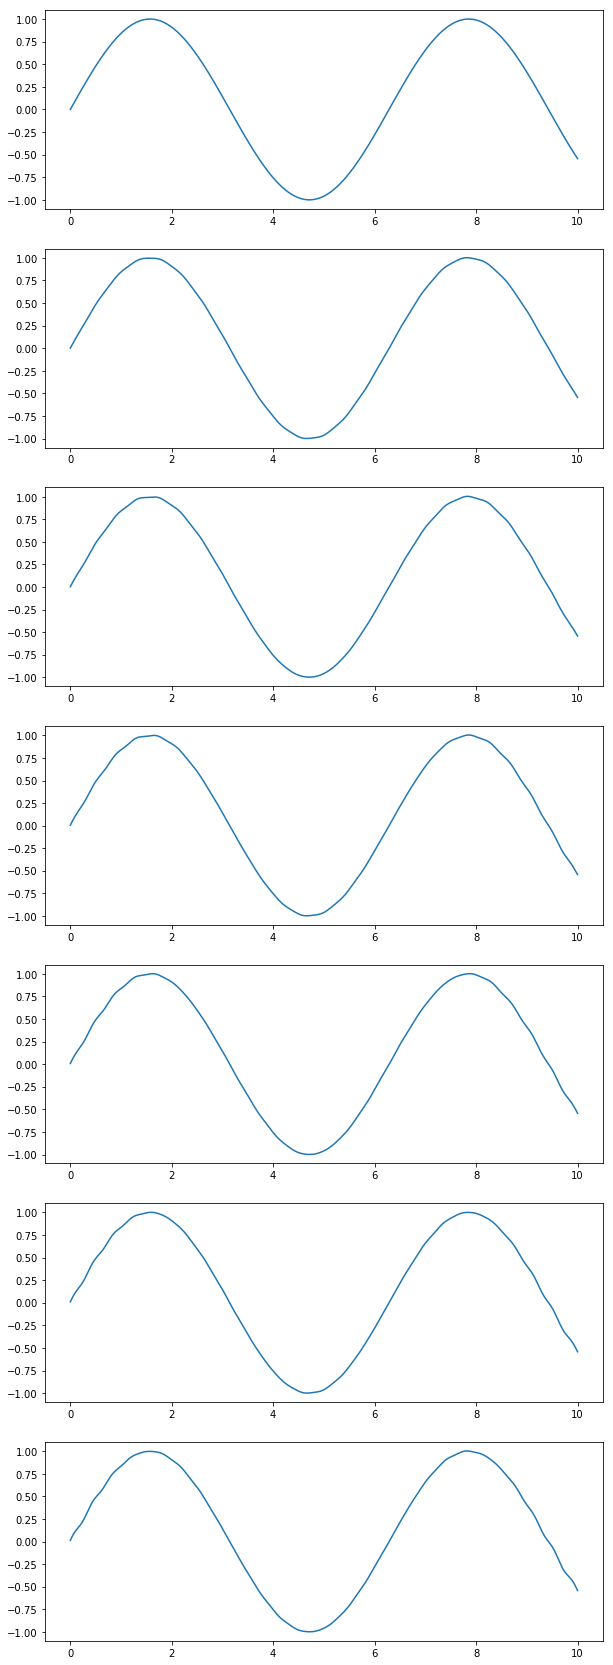

In [182]:
X = [x*0.01 for x in range(1001)]
Y0 = [sin_x(x) for x in X]
plt.figure(figsize = (10, 30))
count = 7
for i in range(count):
    Y = FFT_reduce(Y0, i)
    plt.subplot(count, 1, i+1)
    plt.plot(X, Y)